# Task implementation

- re-calculate DT and LR model performance using different evaluation metrics (e.g., confusion matrix, precision/- recall/f1, roc_auc_score/roc_curve)
- interpret the model performance to understand the advantage and disadvantage of each model
- apply gridsearchcv to find the most suitable hyperparameters for each model
- with the best hyperparameter setting you find in last step, apply KFold cross validation to validate your model performance on each fold
[optional] explore one of the ensemble learning methods to improve your model performance

# Data Overview

## Target Variable:
- belief: category, the religious belief status of the individual, used to classify Atheism(0) and Theism(1).

## Continuous/Numeric Variables:
- age: int64, the age of the user.
- height: float64, the height of the user in centimeters.
- income: int64, the income of the user.
- seriousness_degree: float64, the degree of seriousness about religion. (0 = unspecified ,1-4 = not serious to very serious)

## Categorical Variables:
- status: category, relationship status.
- sex: category, gender.
- orientation: category, sexual orientation.
- body_type: category, body type.
- diet: category, dietary habits.
- drinks: category, alcohol consumption habits.
- drugs: category, drug usage.
- education: category, educational attainment.
- ethnicity: category, ethnic background.
- job: category, employment description.
- location: category, user location.
- offspring: category, children status.
- pets: category, pet preferences.
- religion: category, religious background.
- sign: category, astrological symbol.
- smokes: category, smoking consumption.
- speaks: category, language spoken.
- education_clean: category, cleaned and simplified education information.
- education_final: category, finalized education information after processing.
- cleaned_religion: category, cleaned version of religious background.

## Text Variables:
- My self summary: object, a summary written by the user about themselves.
- What I’m doing with my life: object, user's description of their current life status.
- I’m really good at: object, what the user describes as their strengths.
- The first thing people usually notice about me: object, what the user thinks people notice about them first.
- Favorite books, movies, show, music, and food: object, user's favorites in books, movies, shows, music, and food.
- The six things I could never do without: object, things the user considers essential in their life.
- I spend a lot of time thinking about: object, topics the user often thinks about.
- On a typical Friday night I am: object, user's typical activities on a Friday night.
- The most private thing I am willing to admit: object, something personal the user is willing to share.
- You should message me if…: object, user's criteria for others to contact them.
- merged_profile: object, combined text from all essay sections.


## Selection: 
### Bagging - RF
### &
### Regression, generally not the best suit for classification task
 

In [86]:
# machine learning and visualization libraries
import os
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In this task, the goal is to predict one's religious belief based on the following features:

#8 Catgorical:
diet(clean), 
drinks,
etnicity(clean), 
education(final), 
status, 
drugs, 
smokes, 
orientation,
job(clean)

#2 Num:
age, 
height

$ Tagert:
belief

In [25]:
# Load the training data
# this data contains the encoded and cleaned data and TARGET variable 'belief'
df_X = pd.read_csv('/Users/adhdtreamentii/Desktop/UChicago 2024/UChicago Winter 24/MACSS-30100/Final/data/encoded_cleanedcat_dataX.csv')

print(df_X.shape)
df_X

(16597, 74)


,Unnamed: 0,age,height,belief,diet_clean_anything,diet_clean_halal,diet_clean_kosher,diet_clean_other,diet_clean_unknown,diet_clean_vegan,...,job_clean_military,job_clean_other,job_clean_political,job_clean_rather not say,job_clean_retired,job_clean_sales,job_clean_science,job_clean_student,job_clean_transportation,job_clean_unemployed
0,7,31,65.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,37,65.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,28,72.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,30,66.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14,29,62.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,59602,29,75.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16593,59603,27,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,59609,25,61.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,59614,59,62.0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
df_y = df_X[['belief']]

df_X = df_X.drop(columns=['belief'])
df_X = df_X.drop(columns=['Unnamed: 0']) # drop the index column from uncleaned data

print(f'training shape:{df_X.shape}')
print(f'target shape:{df_y.shape}')

training shape:(16597, 72)
target shape:(16597, 1)


In [27]:
# Create split with Sklearn
df_X_train, df_X_test, df_y_train, df_y_test  = train_test_split(df_X, df_y, test_size = 0.3,random_state = 42)

# View the training and testing feature matrix 
df_X_train.shape, df_X_test.shape

((11617, 72), (4980, 72))

In [68]:
df_X_train

,age,height,diet_clean_anything,diet_clean_halal,diet_clean_kosher,diet_clean_other,diet_clean_unknown,diet_clean_vegan,diet_clean_vegetarian,drinks_desperately,...,job_clean_military,job_clean_other,job_clean_political,job_clean_rather not say,job_clean_retired,job_clean_sales,job_clean_science,job_clean_student,job_clean_transportation,job_clean_unemployed
13450,23,66.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10118,49,66.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,24,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12239,34,71.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7612,24,62.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,23,74.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,24,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,40,72.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,25,64.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
df_y_test

,belief
14027,1
4789,1
14042,0
14766,1
5211,1
...,...
7864,1
13769,1
2186,0
10866,1


## Random Forest classifier

In this task, I will use the same data to:
- train a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
- report its performance on the test set

In [28]:
# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 42)

# train RFC
rf_clf.fit(df_X_train, df_y_train['belief'])

# evaluate the random forest classifier on test set 
float("{:.3f}".format(rf_clf.score(df_X_test, df_y_test['belief'])))

0.737

In [29]:
# modify the model to reduce overfitting

rf_clf = RandomForestClassifier(
    n_estimators=50,        # number of trees in the forest
    criterion='entropy',    
    max_depth=20,         # the maximum depth of the tree
    min_samples_split=2,    # the minimum number of samples required to split an internal node
    min_samples_leaf=3,     # the minimum number of samples required to be at a leaf node
    bootstrap=True,         # whether bootstrap samples are used when building trees
    random_state=42        
)

rf_clf.fit(df_X_train, df_y_train)

test_accuracy = rf_clf.score(df_X_test, df_y_test)
print("Testing Accuracy: {:.3f}".format(test_accuracy))

/opt/anaconda3/envs/aidi/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Testing Accuracy: 0.757


In [37]:
# prediction results of the testing set
y_pred = rf_clf.predict(df_X_test)

print(len(df_y_test))
# reshape the y_test to match the shape of y_pred, 1d array
y_true = np.array(df_y_test).reshape(1, len(df_y_test))[0]

print(y_true)
print(y_pred)

4980
4980
[1 1 0 ... 0 1 0]
[1 1 1 ... 0 1 1]


Atheism(0) and Theism(1).

In [32]:
conf_matrix = confusion_matrix(df_y_test, y_pred)

# extract TN, FP, FN, TP
tn, fp, fn, tp = conf_matrix.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")



True Negatives: 400
False Positives: 1016
False Negatives: 193
True Positives: 3371


True Negatives (TN): 400

This means that the model correctly predicted 400 instances as Atheism (0), where the actual label was indeed Atheism. In other words, these are the cases where the model correctly identified the absence of Theism.
False Positives (FP): 1016

These are instances where the model incorrectly predicted Theism (1), but the actual label was Atheism (0). This is a type of error where the model 'falsely' identified Theism when it wasn't actually present.
False Negatives (FN): 193

This count indicates that there were 193 instances where the model predicted Atheism (0), but the actual label was Theism (1). These are missed opportunities by the model to identify Theism, hence 'false negatives'.
True Positives (TP): 3371

This large number shows that the model correctly predicted 3371 instances as Theism (1), and these instances were indeed Theism in reality. This is a strong indicator that the model is quite effective in identifying cases of Theism.
Interpreting these numbers, I can see that the model is quite good at identifying Theism (True Positives are high), but it also makes a significant number of False Positive errors. This suggests that while the model is adept at recognizing instances of Theism, it also tends to mistakenly classify some Atheism instances as Theism. The relatively high number of False Positives compared to False Negatives could indicate a bias in the model towards predicting Theism.



In [40]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.28      0.40      1416
           1       0.77      0.95      0.85      3564

    accuracy                           0.76      4980
   macro avg       0.72      0.61      0.62      4980
weighted avg       0.74      0.76      0.72      4980



In [43]:
accuracy_score(y_true, y_pred)

0.7572289156626506

For Atheism (0.40): The F1-score, which is a balance between precision and recall, is quite low. This indicates a poor performance for Atheism, largely driven by its low recall.

Recall (0.28): Only 28% of actual Atheism instances were correctly identified by the model. This low recall indicates that the model is missing a large number of Atheism cases, probably due to the imbalance towards Theism (1416 vs. 3564).

The support values show the imbalance in the dataset, with significantly more instances of Theism (3564) than Atheism (1416).

The model is biased towards predicting Theism, likely due to the imbalance in the dataset.
While the model shows promise(good acc), especially in identifying Theism, its performance on Atheism is suboptimal, highlighting the need for extra effort that address the data imbalance and improve overall model fairness.

### roc curve

In [45]:
y_probs = rf_clf.predict_proba(df_X_test)
y_probs

array([[0.26926777, 0.73073223],
       [0.10152921, 0.89847079],
       [0.16170282, 0.83829718],
       ...,
       [0.52500618, 0.47499382],
       [0.11491035, 0.88508965],
       [0.21161054, 0.78838946]])

In [47]:
fpr, tpr, thresholds = roc_curve(df_y_test, y_probs[:, 1])


In [49]:
thresholds

array([       inf, 0.99216088, 0.97494377, ..., 0.24221019, 0.23660484,
       0.19929599])

In [51]:
roc_auc = roc_auc_score(df_y_test, y_probs[:, 1])

roc_auc

0.7682493286601102

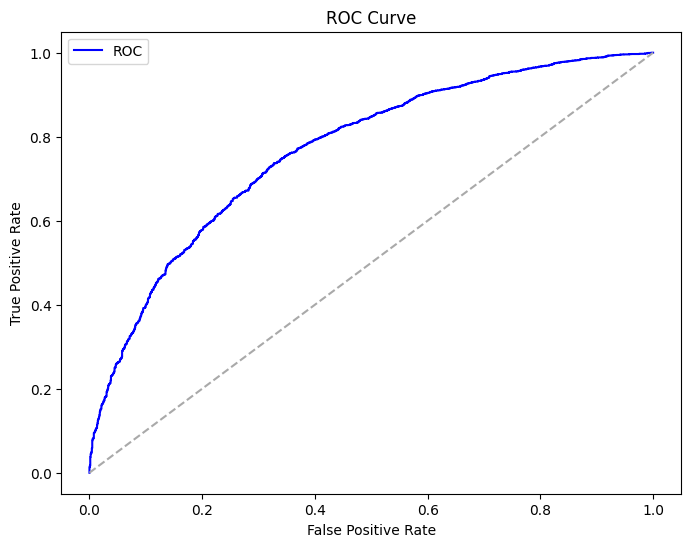

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curve shows a decent separation between the positive and negative classes, as it bows towards the top-left corner of the plot. This indicates that the model has a good measure of separability and is able to distinguish between the two classes better than random guess (p =0.5)

An AUC score of 0.7682 is quite respectable. It suggests that there is a 76.82% chance that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. 

the ROC curve and AUC score indicate that the model has a fair predictive ability, but with an AUC score of approximately 0.7682, there's potential to enhance the model's performance.

- Model performance with bagging

## Discussion about Pros and Cons of different evaluation

Confusion Matrix:
- Pros: offers a overall inspect of model performance, we can interpret TP,FP,FN,TN. This provides a better understanding of a model's capalilities in detecing the different catgories.
- Cons: the scores in CM could be misleading. Espcially when the dataset is imblanced. For example, if the data number of a certain catgory is way more than the other one, this might suggests that the model only perform well on the main catgory.

Precision/Recall/F1:
- P: percision evaluates the accuracy of the positive predictions, meaning the ratio of correctly predicted positive observations to the total predicted positive observations
- Recall: recall = tp / (tp + fn), recall evaluates the ability of the model to identify positive observations
F1: F1 = 2 * (precision * recall) / (precision + recall) # F1 score is the weighted average of the precision and recall
- Cons: High precision can be achieved at the expense of recall and vice versa. F1-score can sometimes be misleading if one class is much easier to predict than the other, or if the dataset is imbalanced.

## Linear models for classification: LogisticRegression 
Firstly, Logistic Regression is specifically designed for binary classification, as it models the probability of a binary outcome using a logistic function, ensuring that the predicted values are sensibly confined between 0 and 1. This is crucial for binary classification tasks where the output is categorical (e.g.,theism/atheism). In contrast, linear models, which predict continuous values, are NOT naturally suited for predicting probabilities and require additional steps to threshold the output for classification. Polynomial regression, while capable of modeling more complex relationships than linear models, still suffers from the same limitation in a binary classification context. 
 Logistic Regression also offers a straightforward interpretation of the relationship between features and the probability of outcomes, which is less intuitive in polynomial models due to their complexity. Furthermore, Logistic Regression can be easily extended to handle multi-class classification problems, making it a better choice for classification tasks.

In [57]:
lr_clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(df_X_train, df_y_train)

/opt/anaconda3/envs/aidi/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# training accuracy
lr_clf.score(df_X_train, df_y_train)

0.7636222776964793

In [60]:
# testing accuracy
lr_clf.score(df_X_test, df_y_test)

0.7602409638554217

In [61]:
np.round(lr_clf.predict_proba(df_X_test[:3]),3)

array([[0.117, 0.883],
       [0.141, 0.859],
       [0.202, 0.798]])

In [63]:
y_pred = lr_clf.predict(df_X_test)
print(confusion_matrix(df_y_test, y_pred))

# classification report
from sklearn.metrics import classification_report
print(classification_report(df_y_test, y_pred))



[[ 457  959]
 [ 235 3329]]
              precision    recall  f1-score   support

           0       0.66      0.32      0.43      1416
           1       0.78      0.93      0.85      3564

    accuracy                           0.76      4980
   macro avg       0.72      0.63      0.64      4980
weighted avg       0.74      0.76      0.73      4980



training accuracy and testing accuracy indicate that the model performance is pretty consistent, so the model is not overfitting

### lr_clf Discussion:
 The recall for classifying the 0-class (the minority class) is unusually low. This is a common issue in imbalanced datasets. The model, having been exposed to more instances of class 1, becomes better at identifying class 1 and less effective at recognizing class 0. As a result, even if the overall accuracy of the model seems high, its ability to correctly identify instances of the minority class (class 0) is compromised, leading to a low recall for that class.

### Logistics Regression Vs. Random Forrest:
- In short, no clear winner.

Reflecting on the performance metrics of my Logistic Regression (LR) and Random Forest (RF) models, I observe that both have their merits. The LR model appears slightly more balanced in terms of precision and recall for the minority class, class 0, with a modestly higher F1-score. This suggests that LR is somewhat more adept at correctly identifying the class 0 instances, which is important in my context of an imbalanced dataset. On the other hand, the RF model demonstrates superior recall for the majority class, class 1, but this could be partly due to the class imbalance and not necessarily indicative of better performance.

The accuracy of both models is comparable, which makes it challenging to choose one over the other solely based on this metric. Given that the macro and weighted averages of the F1-scores are also similar, there is no clear winner. However, considering the complexity and interpretability, the LR model is simpler and offers better insights into the relationship between features and the target variable, which is highly valuable to me.

Moving forward to GridSearch. However, because RF has a larger number of hyperparameters that can be tuned, such as the number of trees, maximum depth, and minimum samples per leaf, it might exhibit a more significant improvement after a grid search. This could potentially enhance its performance and perhaps even surpass the current slight edge held by LR. 

## GridSearchCV
- search for the best hyperparameter settings

In [74]:
# Convert the target variable to 1d array


df_y_train = df_y_train['belief'].values.ravel()
print(df_y_train)

df_y_test = df_y_test['belief'].values.ravel()
print(df_y_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

please ignore this Error message because I accidently clicked twice

In [77]:
print(df_y_train)

print(df_y_test)

[1 1 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [82]:
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [10, 20], # the maximum depth of the tree， None would cause overfitting based on prior experience in last hw
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# scoring method
scorer = make_scorer(accuracy_score)

# GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring=scorer, cv=5)

# grid search
grid_search.fit(df_X_train, df_y_train)

# get the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters found: ", best_params)


Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [83]:
best_estimator

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [84]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [85]:
grid_search.best_score_

0.7571665297189002

It seems like there's no a obvious change in grid_search result,(in order to save computing time, I didn't apply full parameter settings)


In [ ]:
'''
original model accuracy: 0.76

parameter tuning accuracy: 0.75

original settings:  
rf_clf = RandomForestClassifier(
    n_estimators=50,        # number of trees in the forest
    criterion='entropy',    
    max_depth=20,         # the maximum depth of the tree
    min_samples_split=2,    # the minimum number of samples required to split an internal node
    min_samples_leaf=3,     # the minimum number of samples required to be at a leaf node
    bootstrap=True,         # whether bootstrap samples are used when building trees
    random_state=42        
)

'''


It seems like the tuning effect is not suffient, perhaps we are close to reach the limit of model performance (marginal effect)
Moving forward, I will apply my original setting to K-folds

In [87]:
rf_clf_best = RandomForestClassifier(
    n_estimators=50,
    criterion='entropy',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=3,
    bootstrap=False,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(rf_clf_best, df_X_train, df_y_train, cv=kf)

# output the accuracy scores for each fold
print("KFold Accuracy Scores:", cv_scores)

# average accuracy score
print("Average KFold Accuracy:", np.mean(cv_scores))

KFold Accuracy Scores: [0.76979346 0.75860585 0.7533362  0.76409815 0.74042187]
Average KFold Accuracy: 0.7572511063872982


# Conclusion:

The lack of significant improvement in model performance after hyperparameter optimization using GridSearchCV reveals some key insights. 
- Firstly, it might indicate that my current model is approaching its performance limit, and further optimization may not yield substantial gains. In such cases, I might need to consider changing the model architecture or introducing more feature data to hope for improved performance.

- Secondly, I've noticed that my model struggles with correctly identifying class 0 (Atheism), particularly evident in the low recall. This suggests that my model has difficulties handling the minority class in an imbalanced dataset. Such imbalance could lead to an overestimated accuracy, as the model tends to predict the dominant class. Therefore, I think my next plan should include training the model with a more balanced dataset. By selecting roughly equal numbers of class 0 and class 1 data, I can assess the model's performance on both classes more fairly.

This approach should help reduce the oversight of the minority class and might improve the recall for class 0. Additionally, a model trained on a balanced dataset might have better generalization capabilities and more accurately reflect the model's performance in real-world applications.

